#### *Importing*

In [1]:
#importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
# Suppress all warnings
warnings.filterwarnings('ignore')


In [3]:
# importing dataset and storing in variable "df"
df=pd.read_csv("diabetes.csv")


#### Data Inspection & Exploration

In [4]:
#print in table format
display(df)


,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Out come
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#Basic information of Dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Out come                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Number of records & Features
df.shape


(768, 9)

In [7]:
#All column names
df.columns


Index(['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI', 'Diabetes Pedigree Function', 'Age', 'Out come'],
      dtype='object')

In [8]:
#First 5 columns
df.head()


,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Out come
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
#Last 5 columns
df.tail()


,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Out come
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
#Datatypes of every colum
df.dtypes


Pregnancies                     int64
Glucose                         int64
Blood Pressure                  int64
Skin Thickness                  int64
Insulin                         int64
BMI                           float64
Diabetes Pedigree Function    float64
Age                             int64
Out come                        int64
dtype: object

In [11]:
# Dataset Statistics
df.describe()


,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Out come
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### *Data Validation & Cleaning*

In [12]:
#number of duplicate values
df.duplicated().sum()


0

In [13]:
#number of null values
df.isna().sum()


Pregnancies                   0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Out come                      0
dtype: int64

In [14]:
df.T.duplicated()


Pregnancies                   False
Glucose                       False
Blood Pressure                False
Skin Thickness                False
Insulin                       False
BMI                           False
Diabetes Pedigree Function    False
Age                           False
Out come                      False
dtype: bool

In [15]:
total_outliers = 0

for column in df.drop('Out come',axis=1).columns:
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > 3]
    num_outliers = len(outliers)
    total_outliers += num_outliers
    print(f"{column}: {num_outliers}")

print(f"\nTotal number of outliers : {total_outliers}")


Pregnancies: 4
Glucose: 5
Blood Pressure: 35
Skin Thickness: 1
Insulin: 18
BMI: 14
Diabetes Pedigree Function: 11
Age: 5

Total number of outliers : 93


#### Exploratory Data Analysis

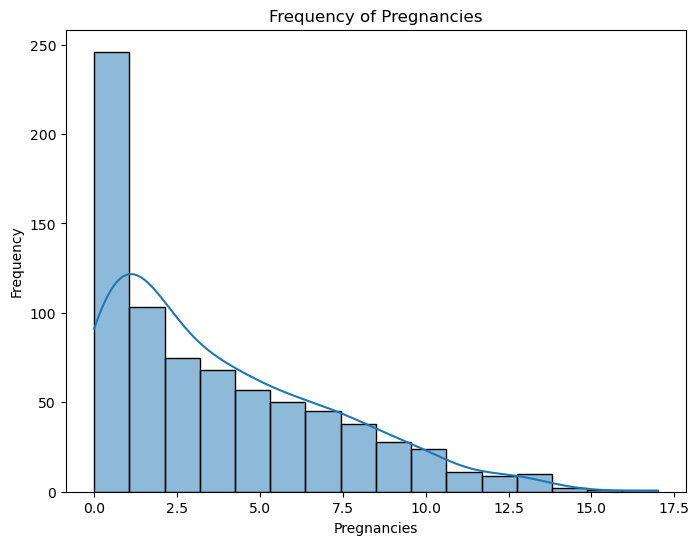

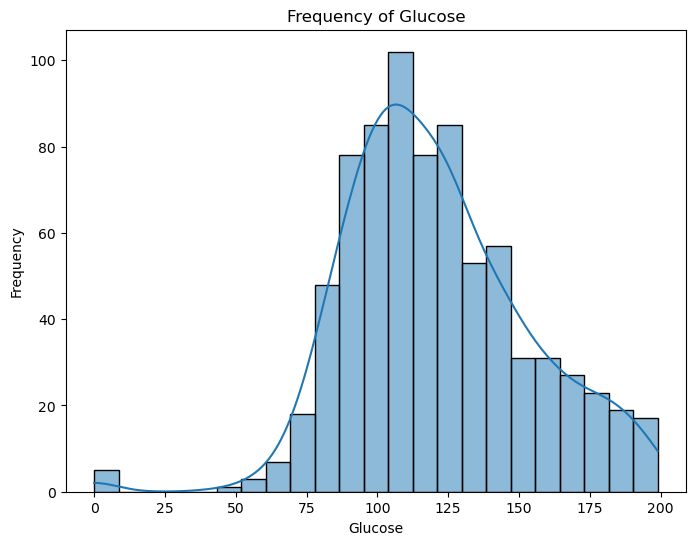

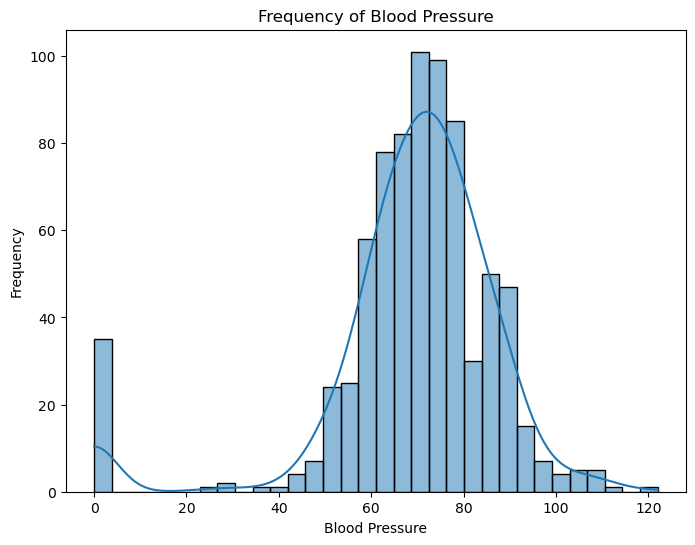

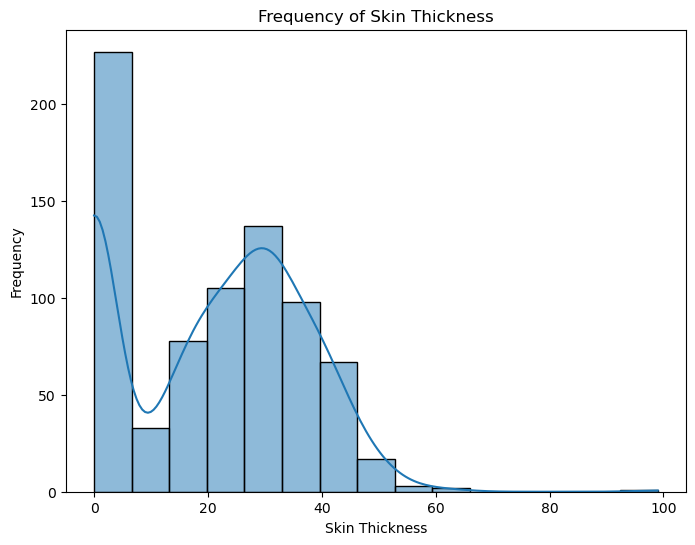

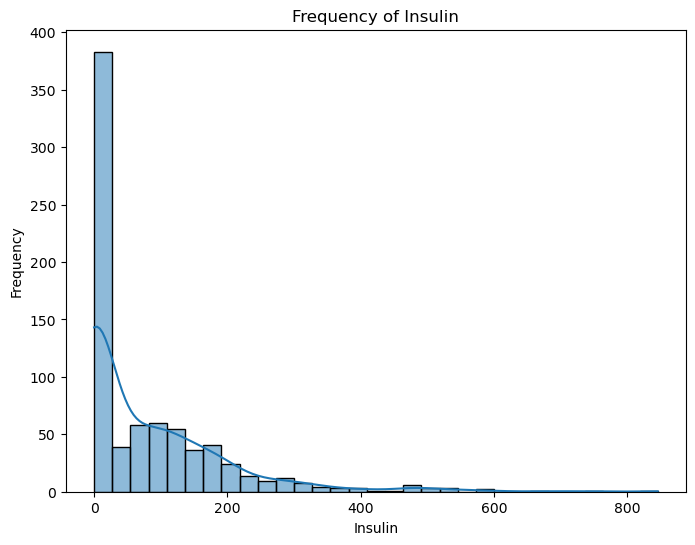

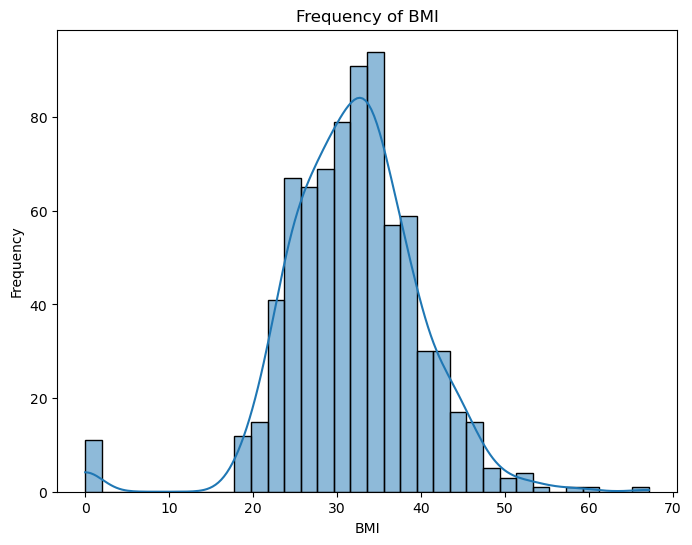

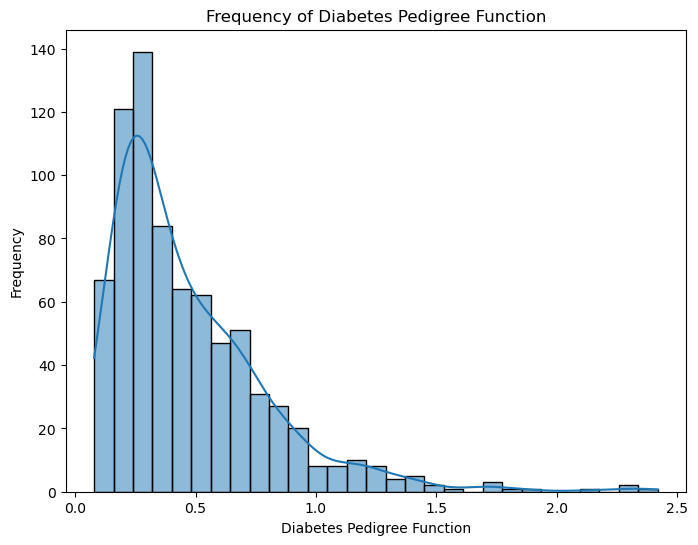

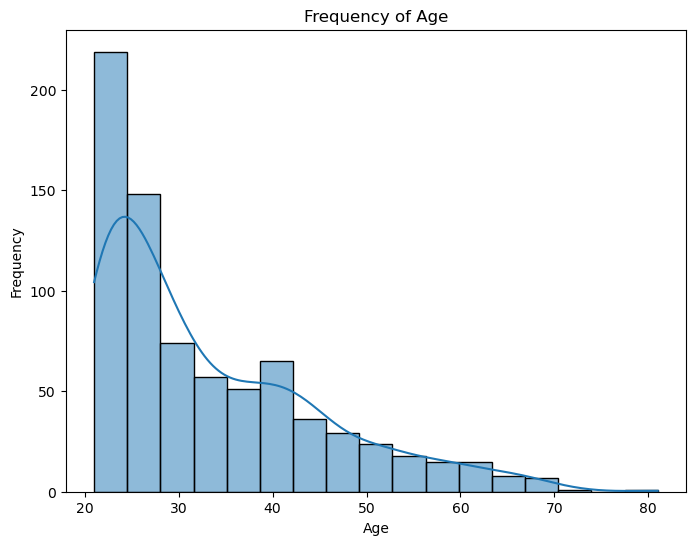

In [16]:
# Histograms and KDE plots for Independent columns
for col in df.drop('Out come',axis=1).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, multiple='dodge')
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


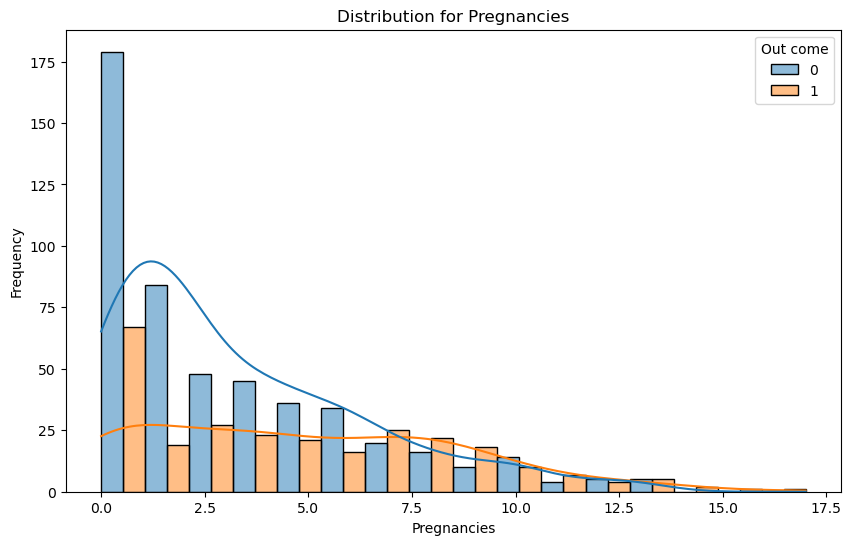

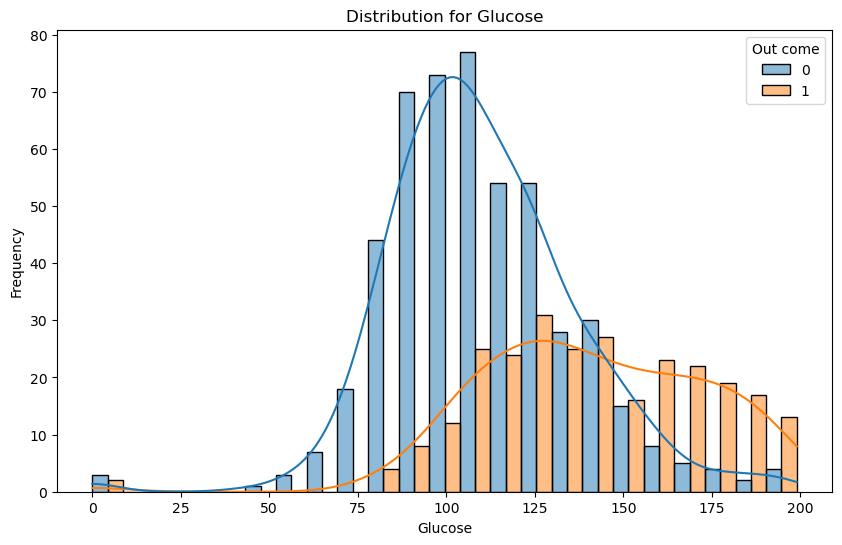

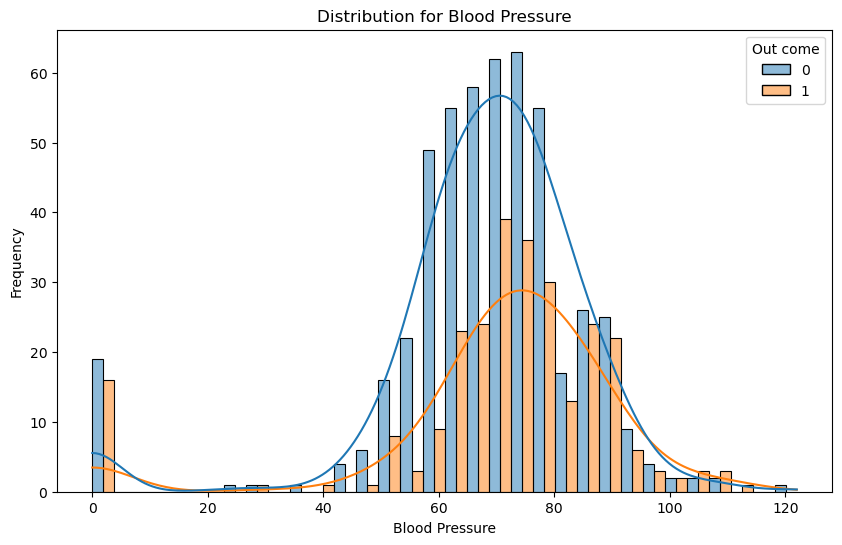

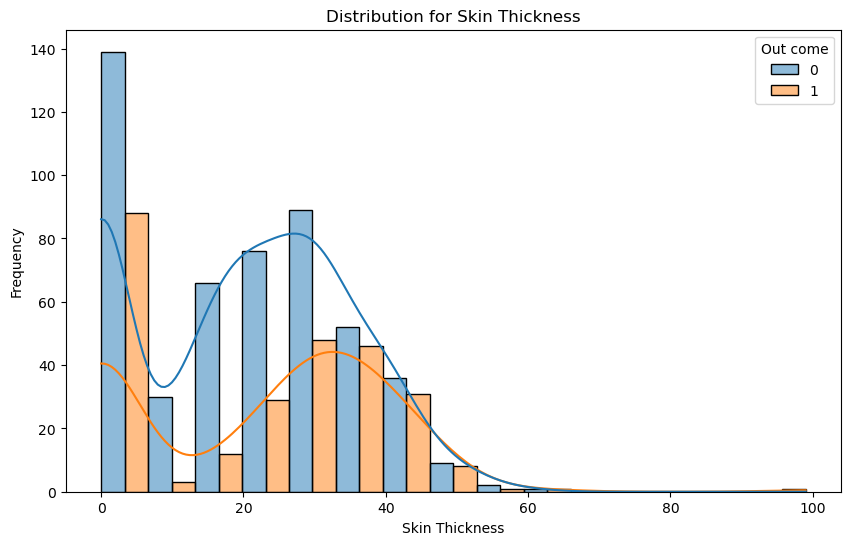

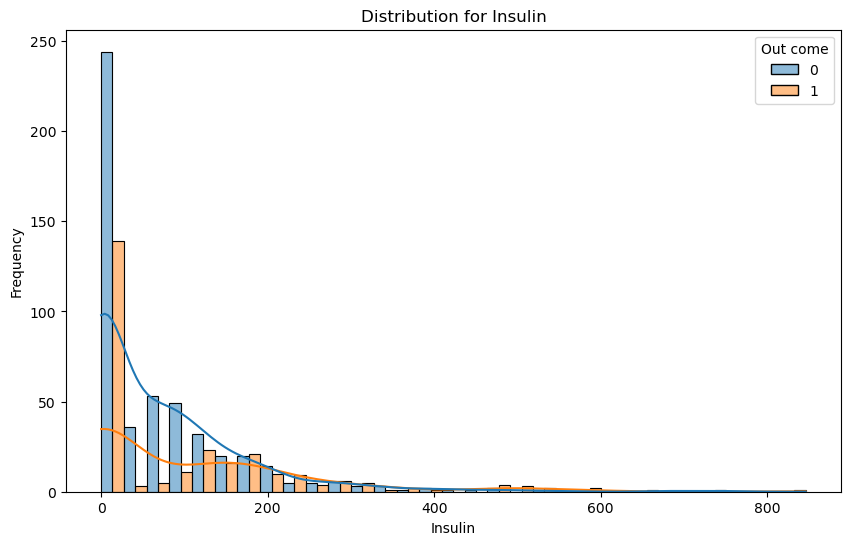

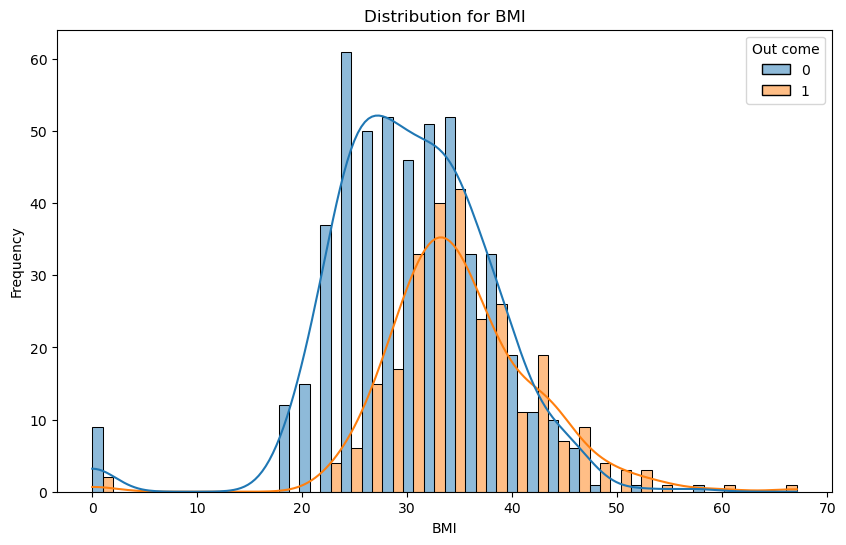

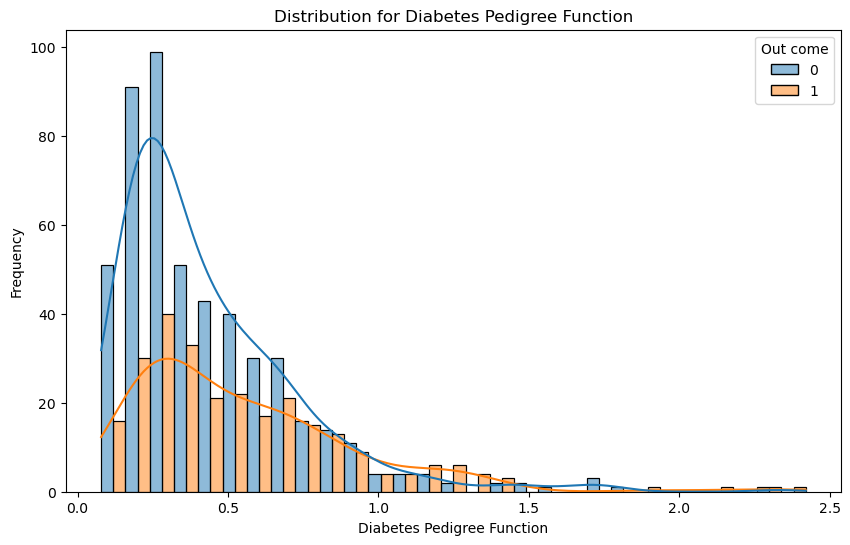

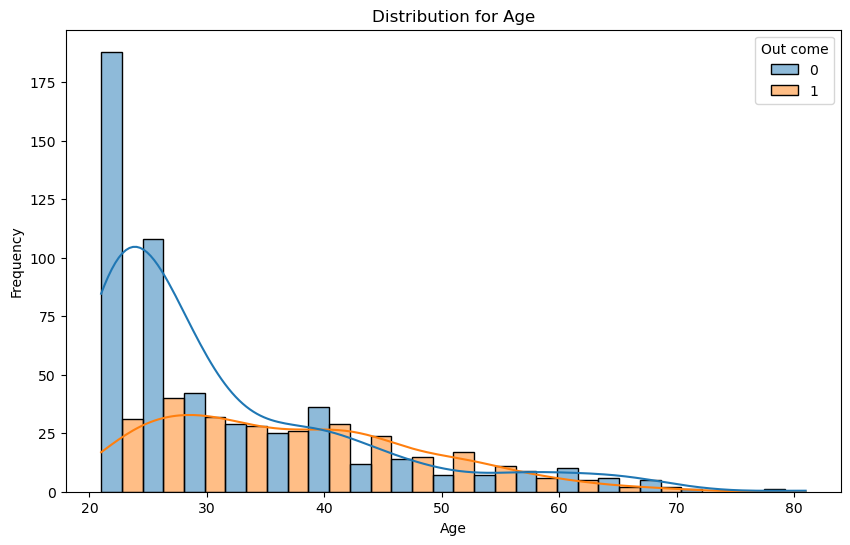

In [17]:
# Histograms and KDE plots for Independent columns
# 1--tested positive, 0-tested negative

for col in df.drop('Out come',axis=1).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True, hue='Out come', multiple='dodge')
    plt.title(f"Distribution for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


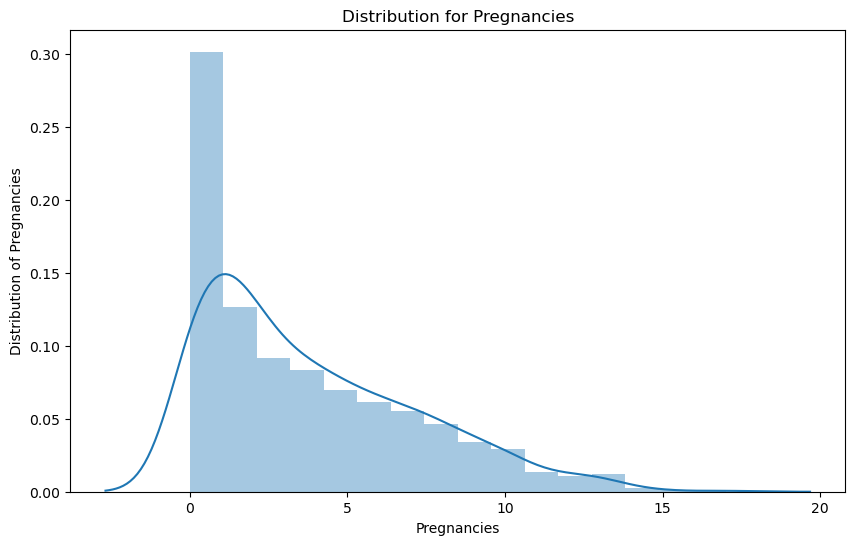

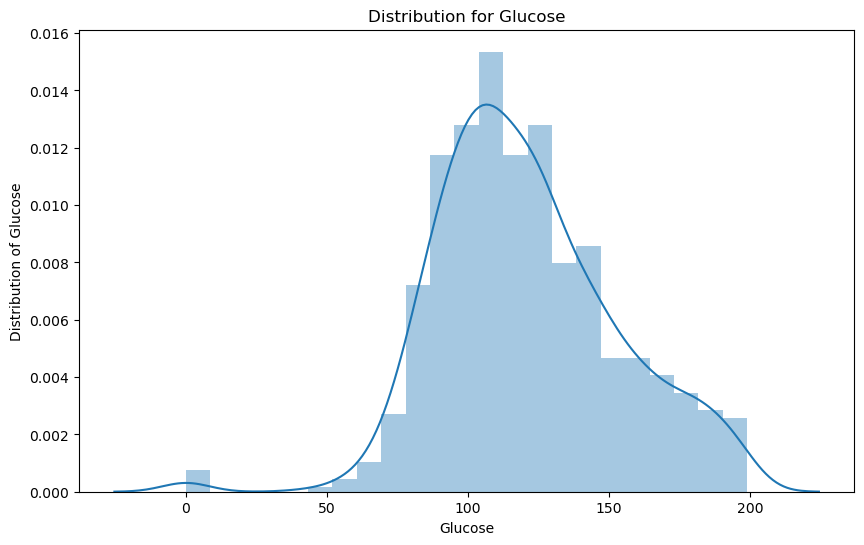

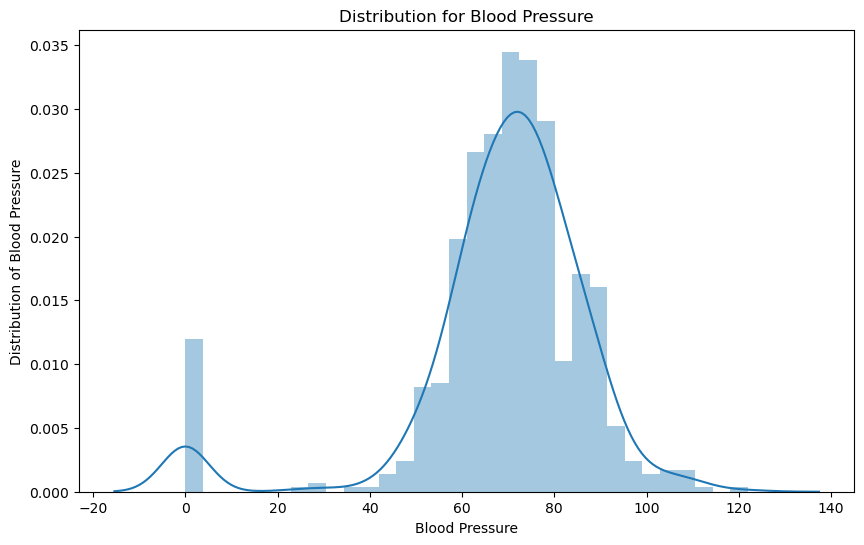

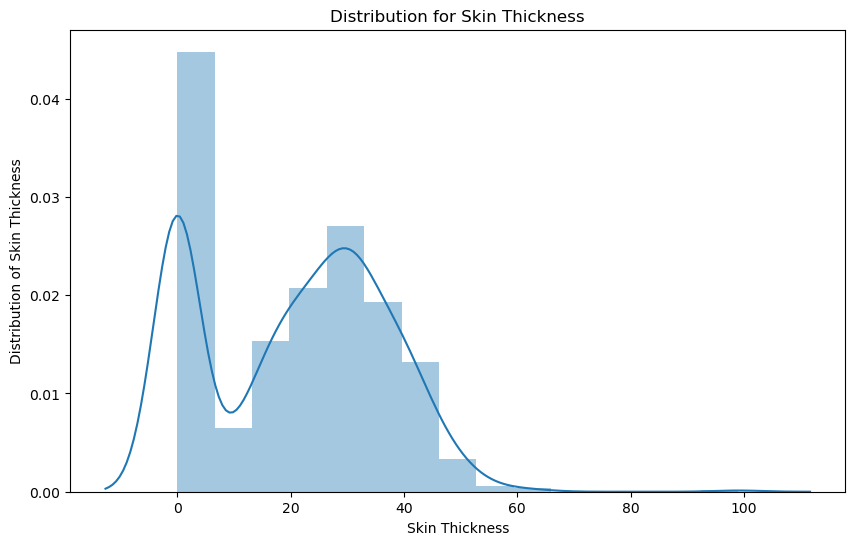

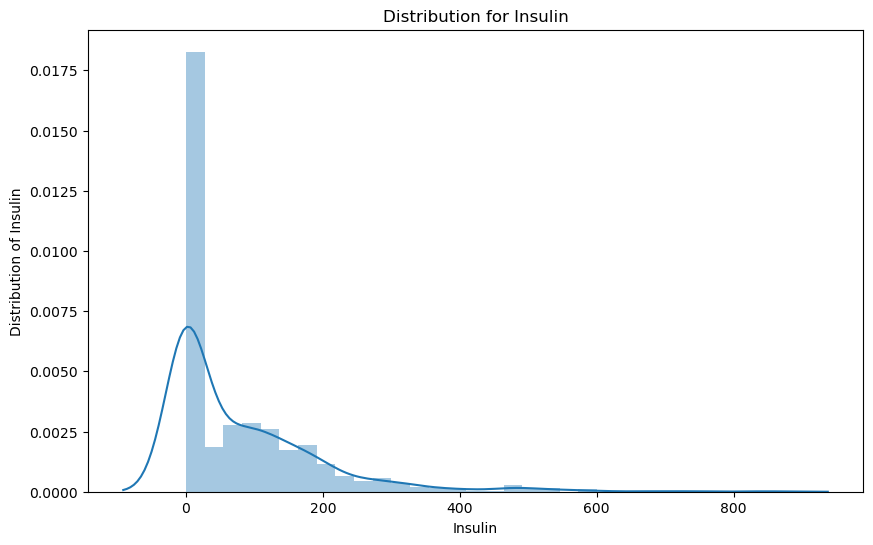

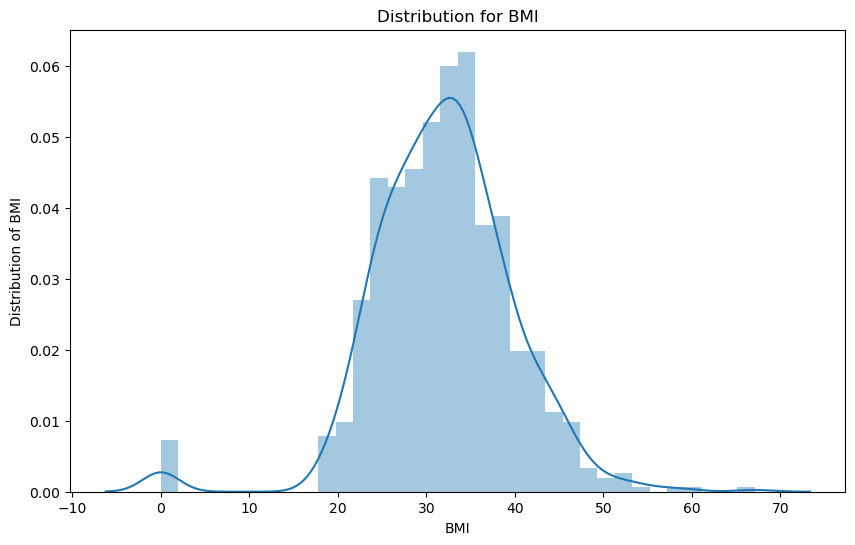

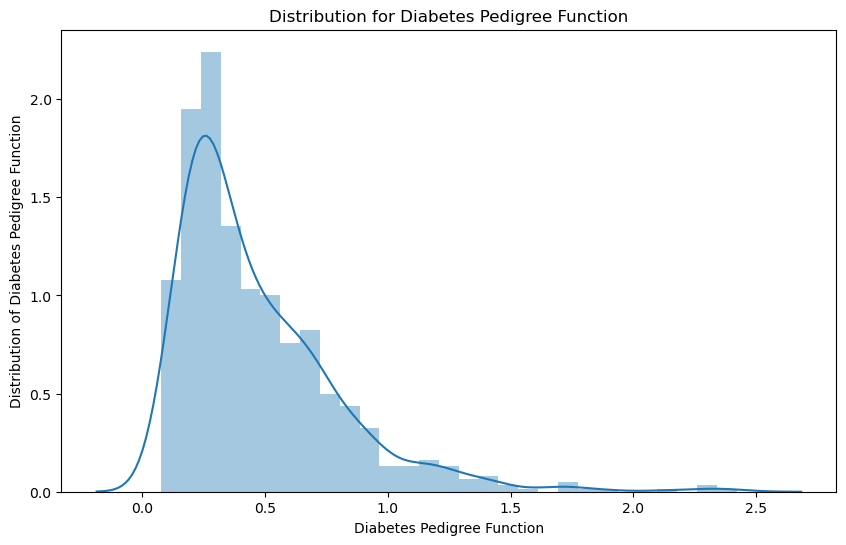

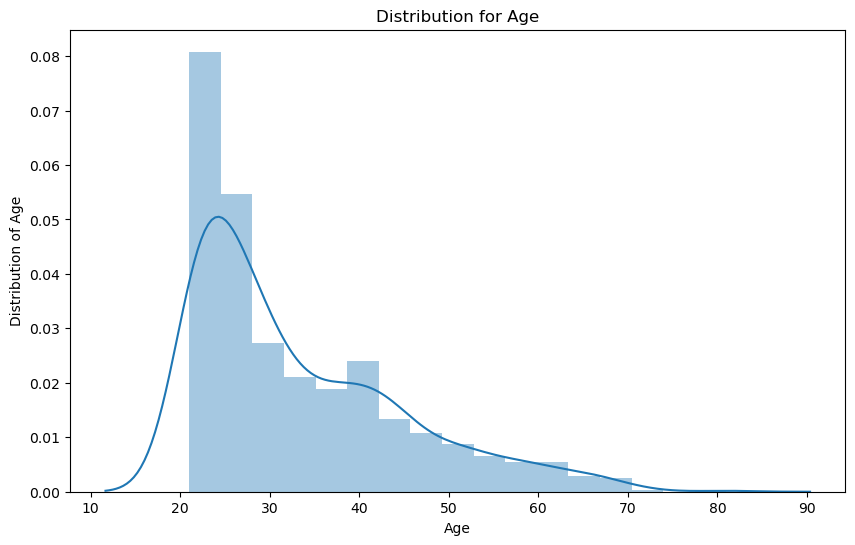

In [18]:
#Distibution plot for independent columns
for col in df.drop('Out come',axis=1).columns:
    plt.figure(figsize=(10, 6))
    plt.title(f"Distribution for {col}")
    plt.xlabel(col)
    plt.ylabel(f"Distribution of {col}")
    sns.distplot(x=df[col])
    plt.show()


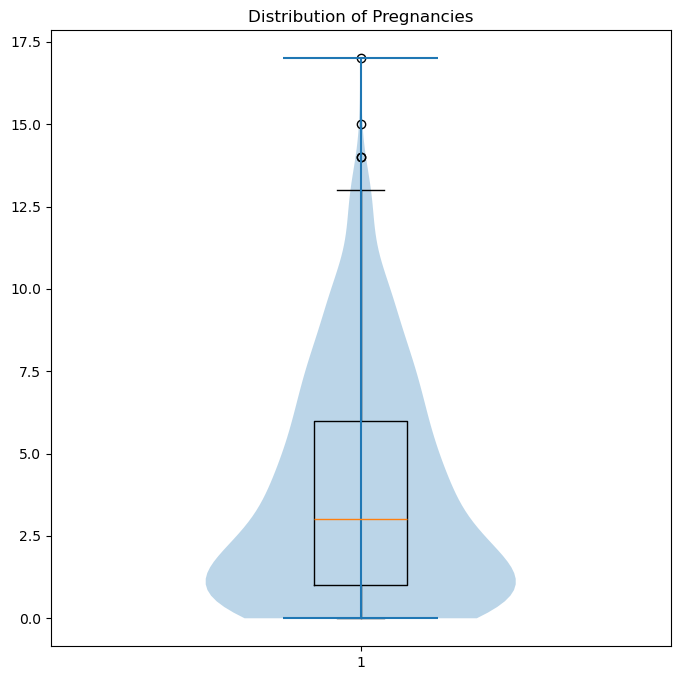

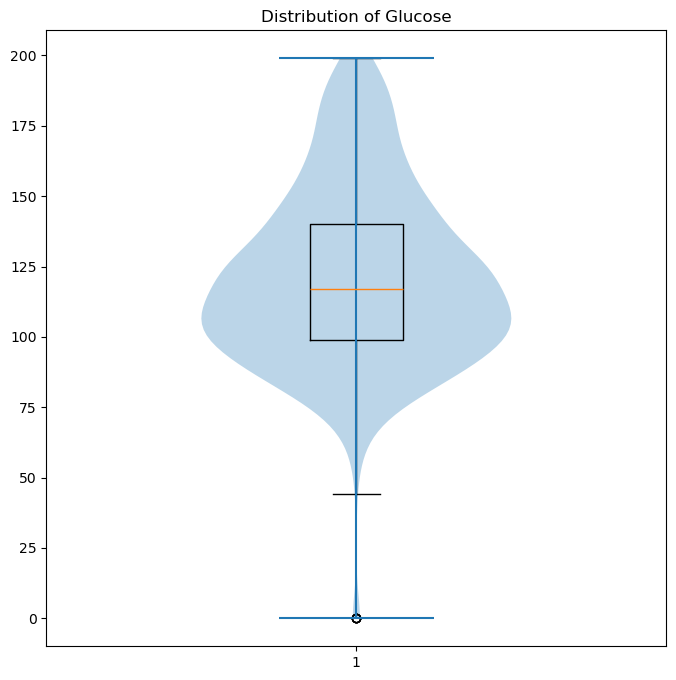

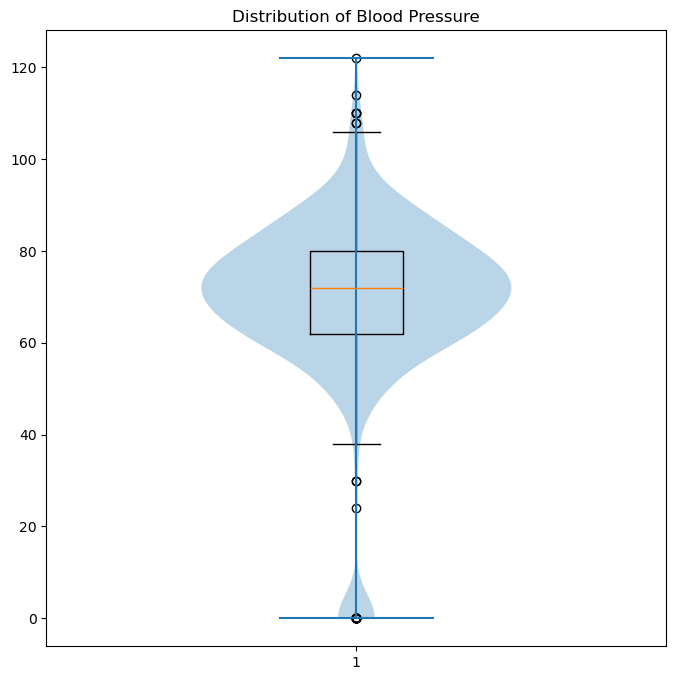

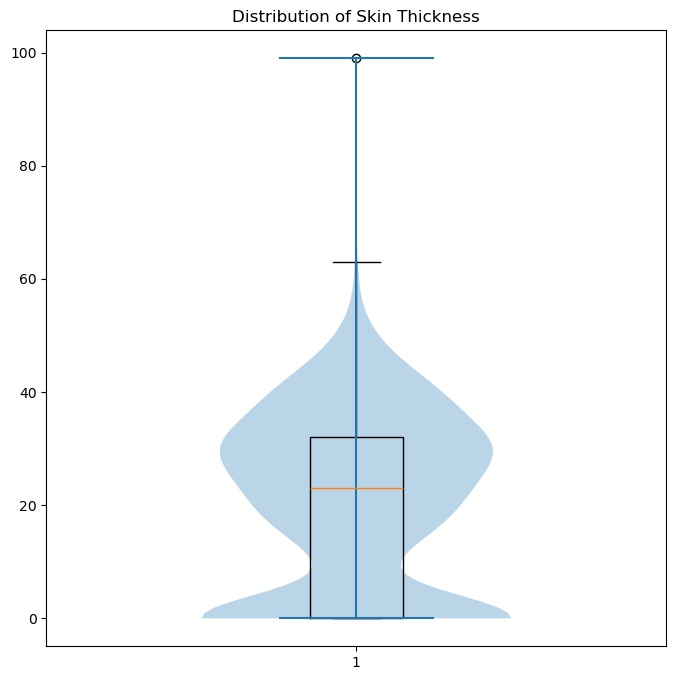

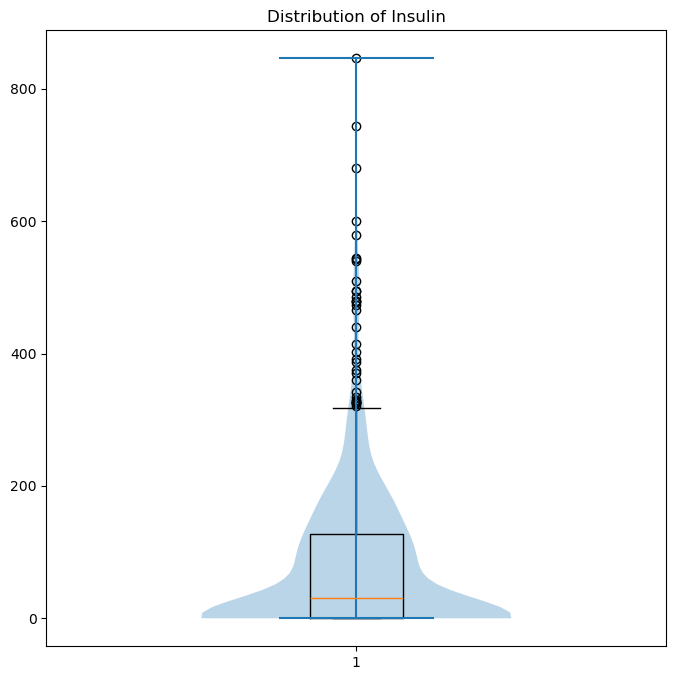

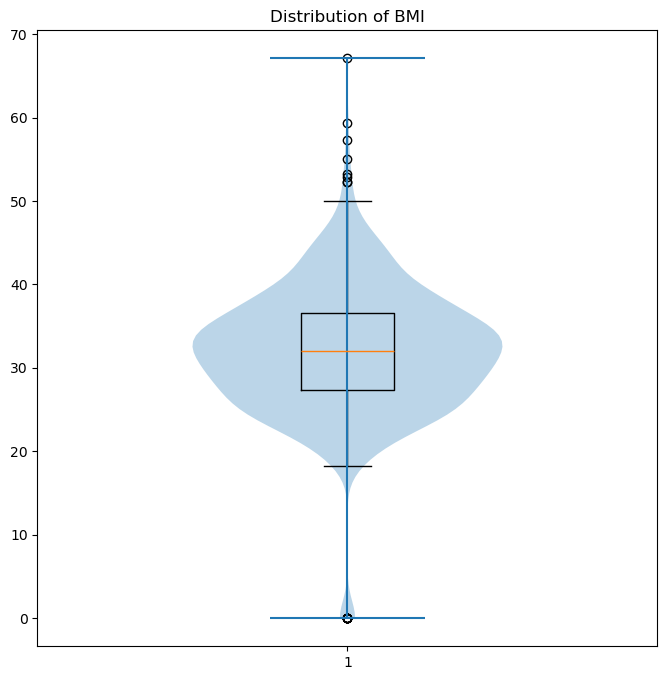

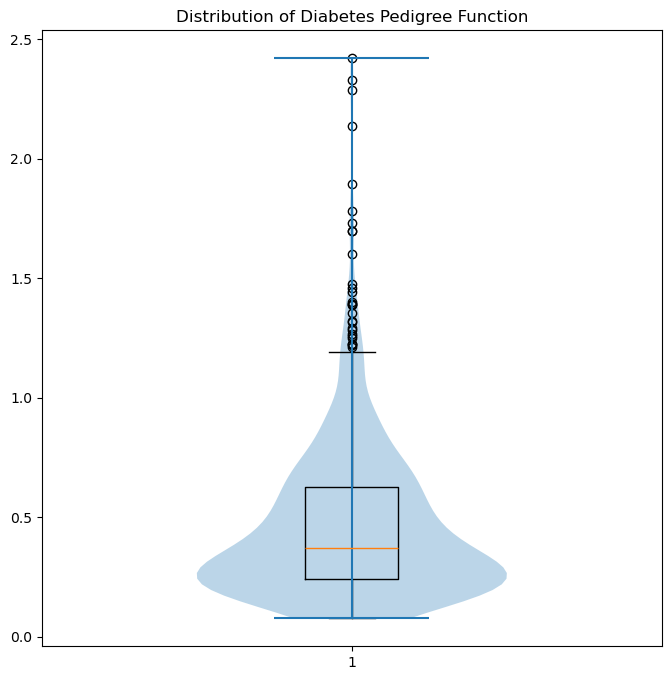

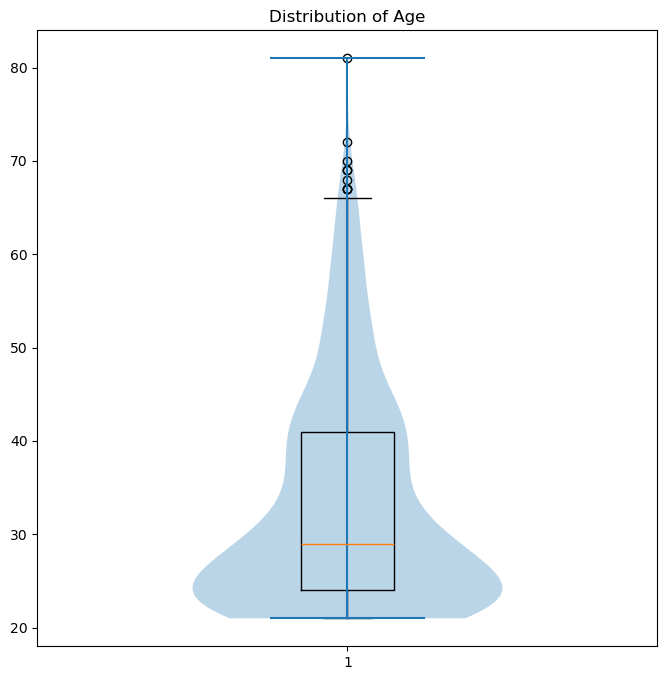

In [19]:
#Box & violin plots for detecting outliners independent columns
for col in df.drop('Out come',axis=1).columns:
    plt.figure(figsize=(8, 8))
    plt.boxplot(df[col])
    plt.violinplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()


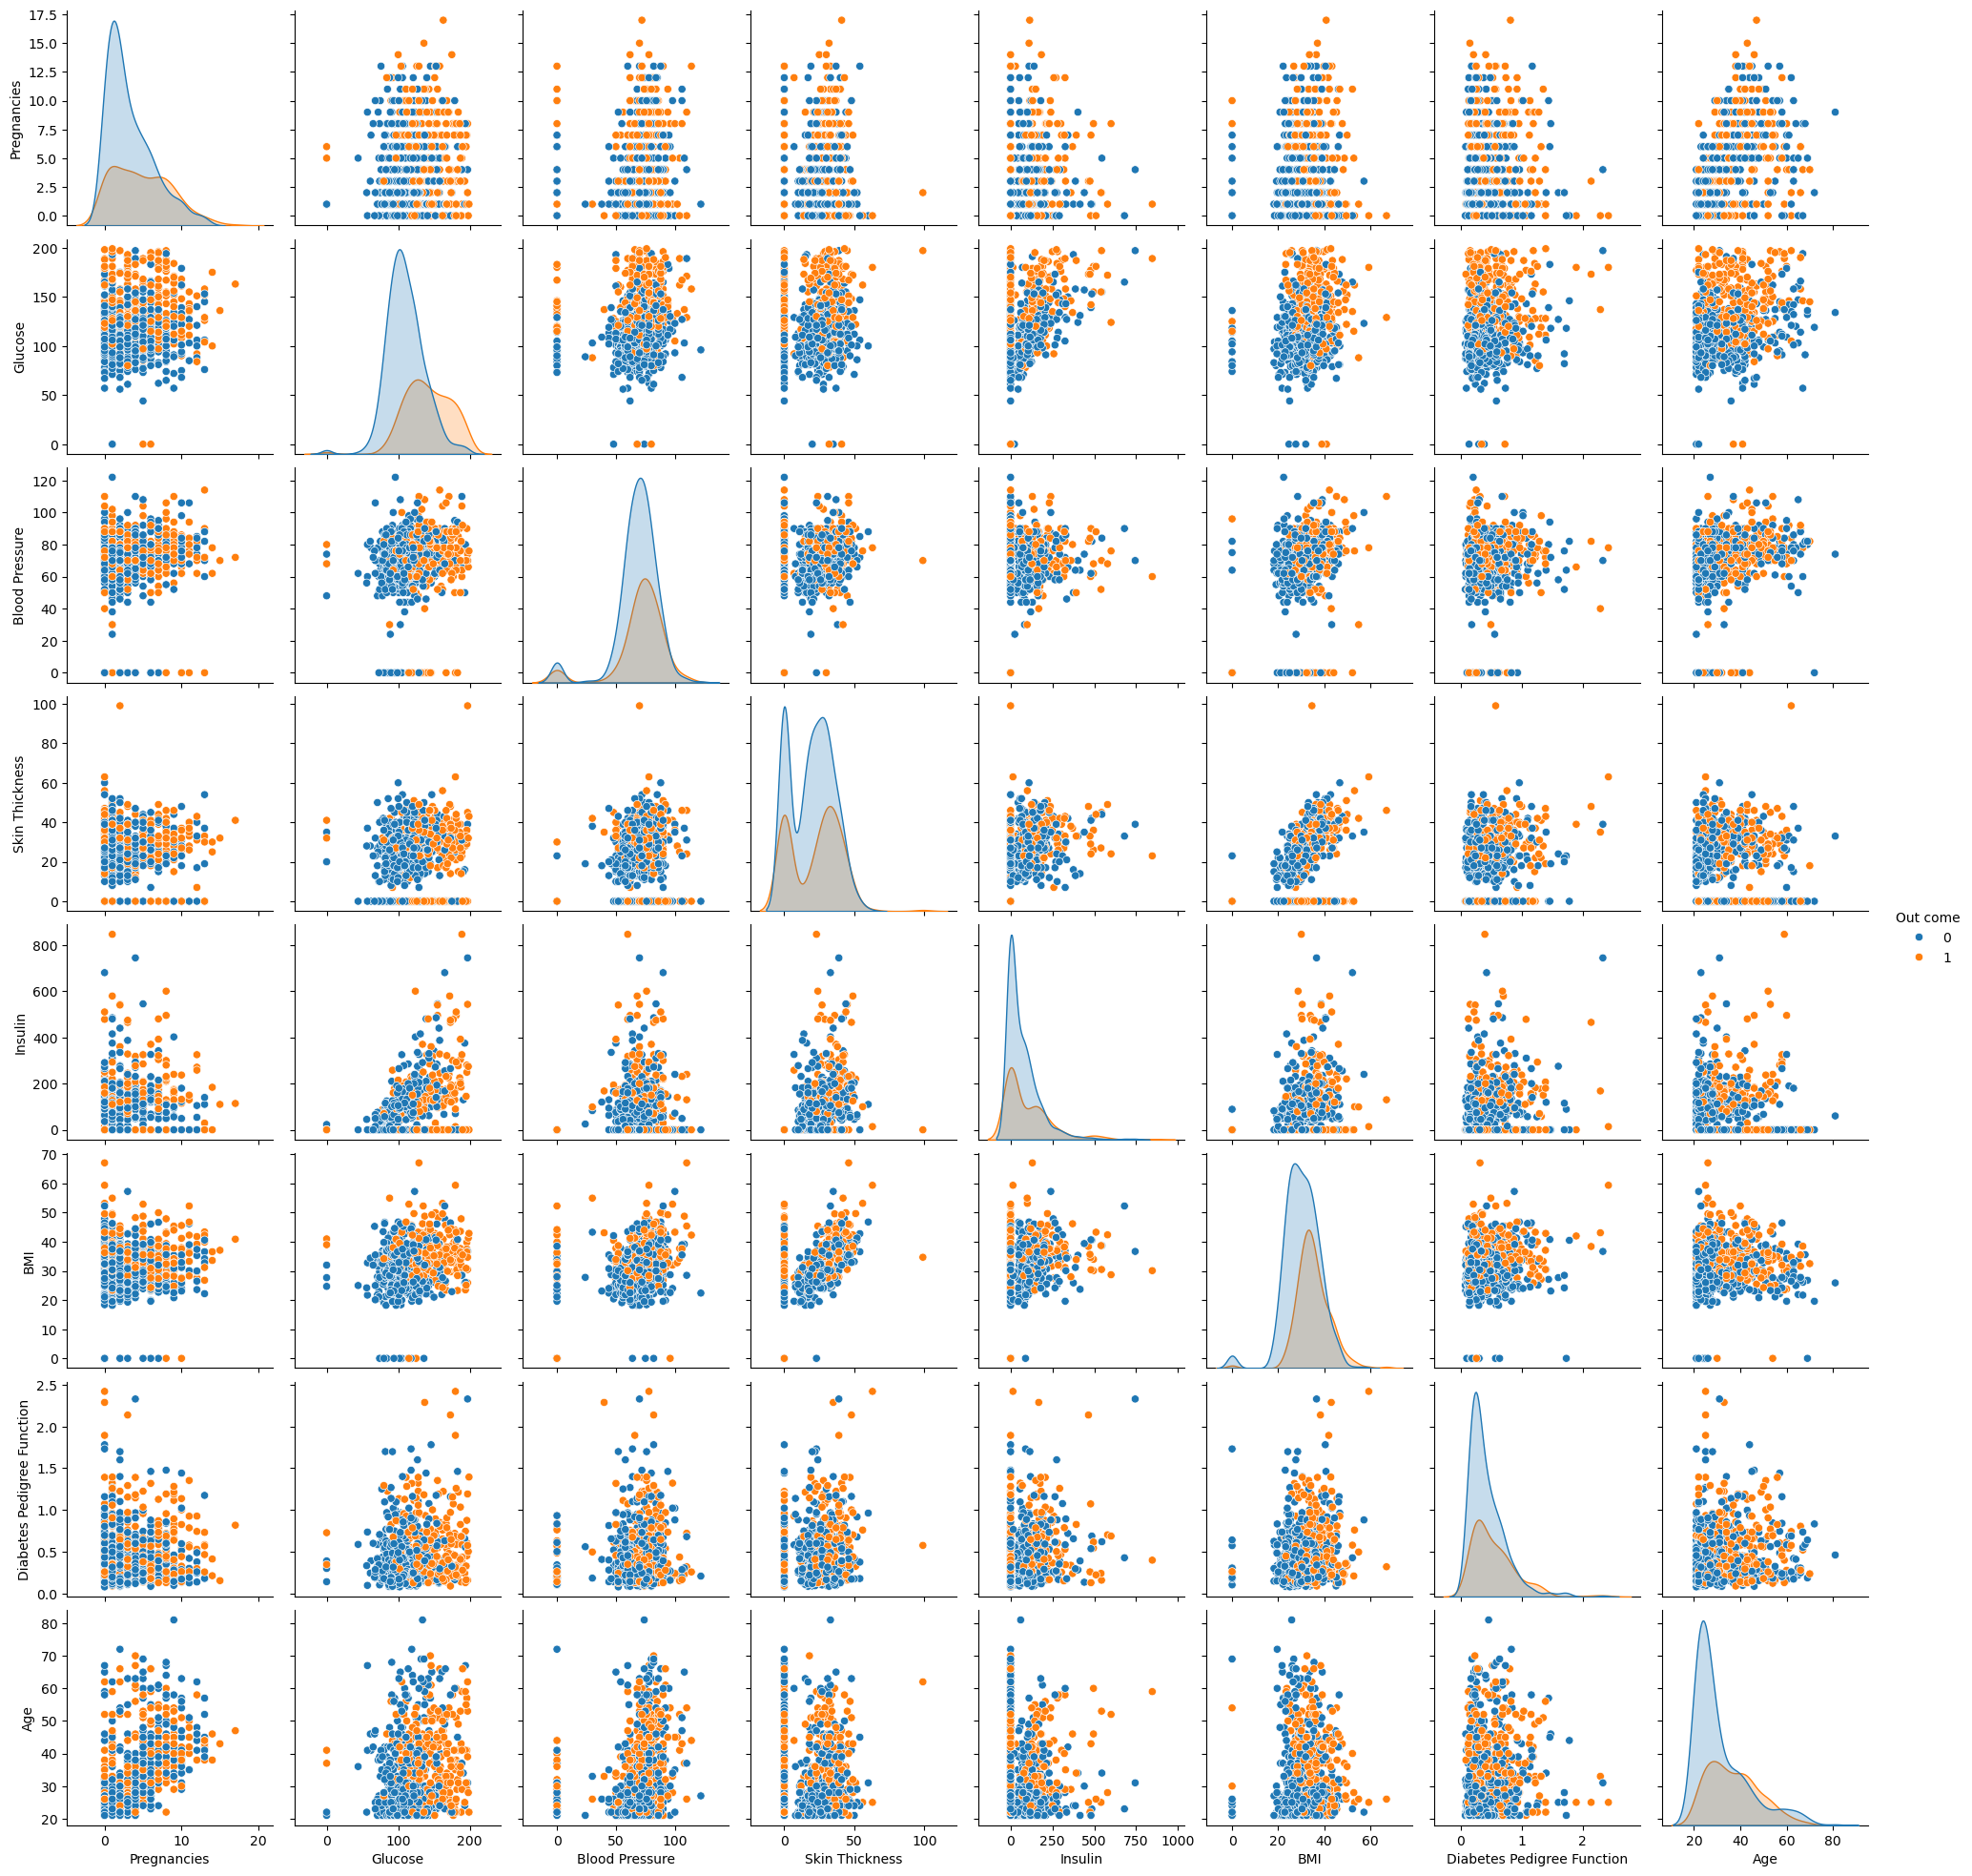

In [20]:
# Pair plot of dataset of having 1--tested positive, 0-tested negative
sns.pairplot(df, hue='Out come', diag_kind='kde')
plt.show()


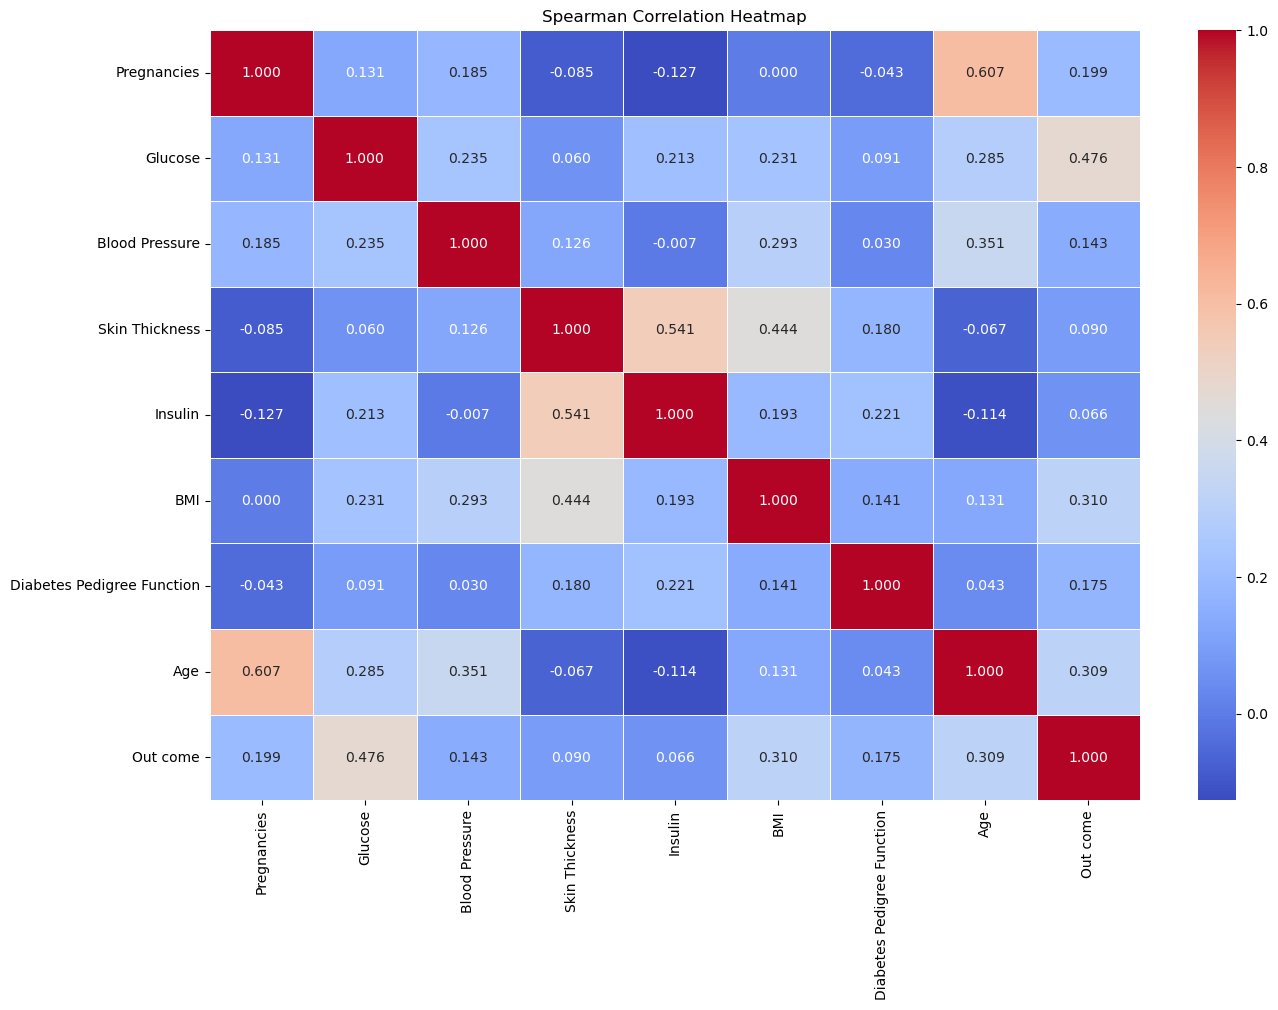

In [21]:
# Calculate Spearman rank correlation coefficient
sm_coefficient = df.corr(method="spearman")
plt.figure(figsize=(15, 10))
sns.heatmap(sm_coefficient, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()


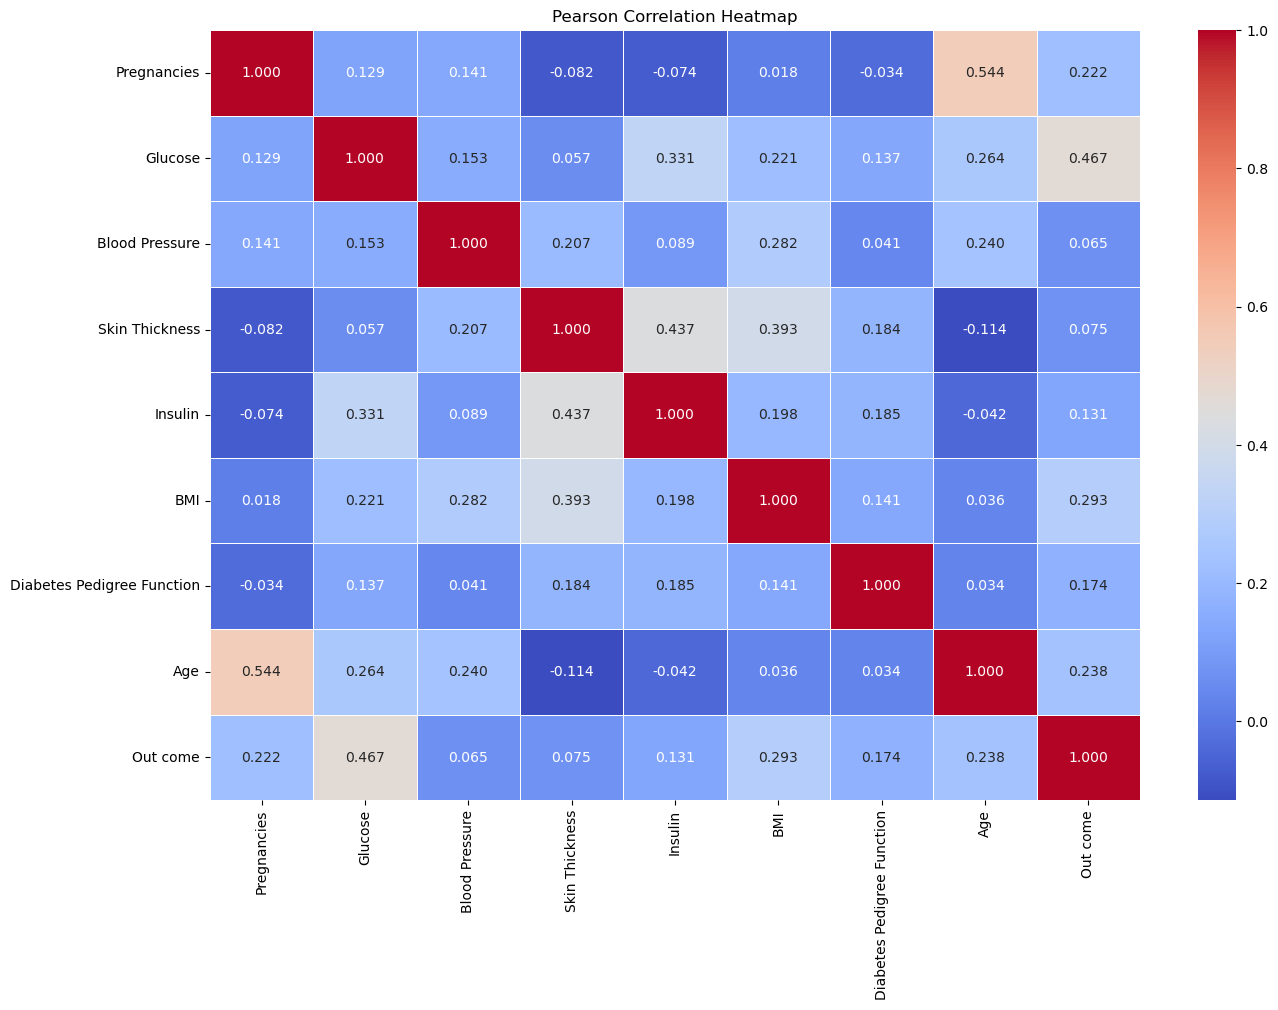

In [22]:
# Compute correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()


### Supervised Algorithms

#### Classification algorithms

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve


In [24]:
# X-->Independent variables y-->Dependent variable
X=df.drop('Out come',axis=1)
y=df['Out come']

display(X)
display(y)


,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Out come, Length: 768, dtype: int64

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
#number of Features and records for X_train, X_test, y_train, y_test
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(614, 8)

(154, 8)

(614,)

(154,)

In [27]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
display(X_train),display(X_test)


array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

array([[ 0.68185612, -0.71402038, -0.61712658, ...,  0.26073561,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.27664283,  0.30191569, ...,  0.48053518,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.40160784, -0.29275872, ..., -0.15300476,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.80774414,  0.13973176, ...,  0.62275843,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.78555979,  0.03160914, ..., -0.51502758,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.46381046,  0.03160914, ...,  0.42881763,
         0.70068816,  0.53008521]])

(None, None)

In [29]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # AUC-ROC
    y_probs = model.predict_proba(X_test)[:, 1] 
    auc = roc_auc_score(y_test, y_probs)

    # Error checking: Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_test, y_pred),
        'AUC': auc,
        'y_probs': y_probs
   }


In [30]:
# Print evaluation metrics for each supervised model
for model_name, metrics in results.items():
    print(f"Model: {model_name}\n")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"AUC: {metrics['AUC']:.3f}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("\n" + "="*50 + "\n")


Model: Logistic Regression

Accuracy: 0.75
AUC: 0.815
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Model: Decision Tree

Accuracy: 0.75
AUC: 0.742
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Model: Random Forest

Accuracy: 0.75
AUC: 0.816
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1  

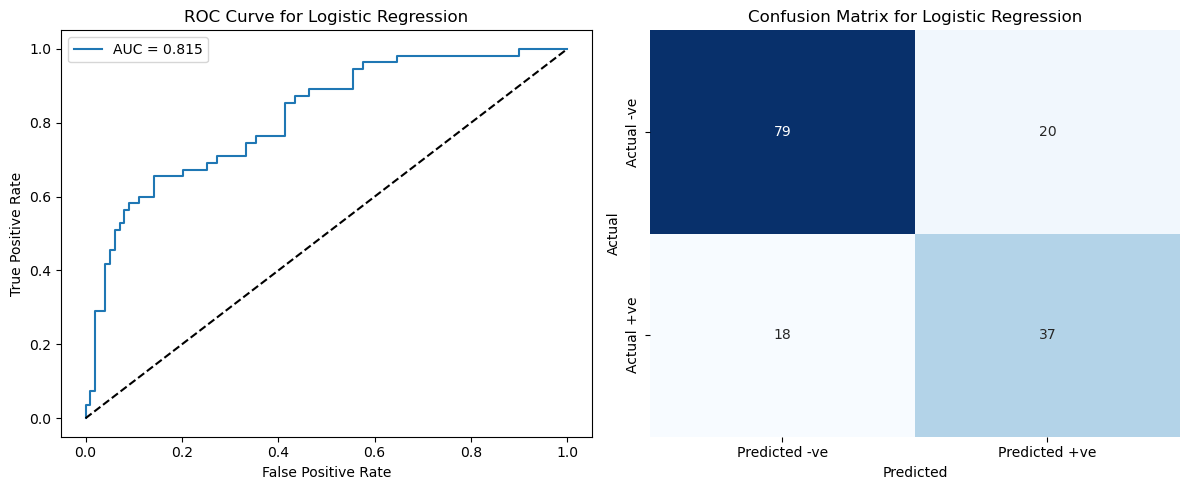

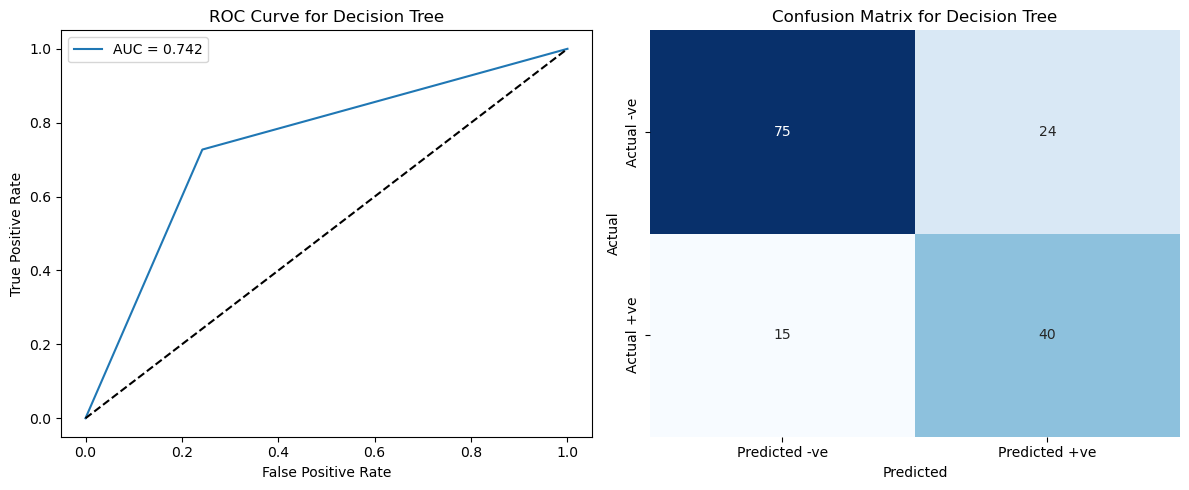

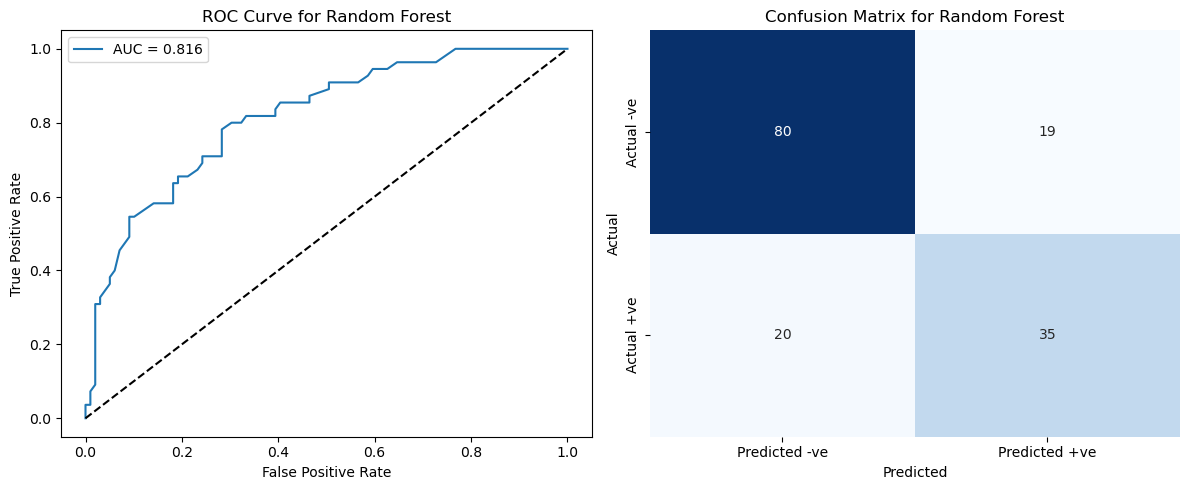

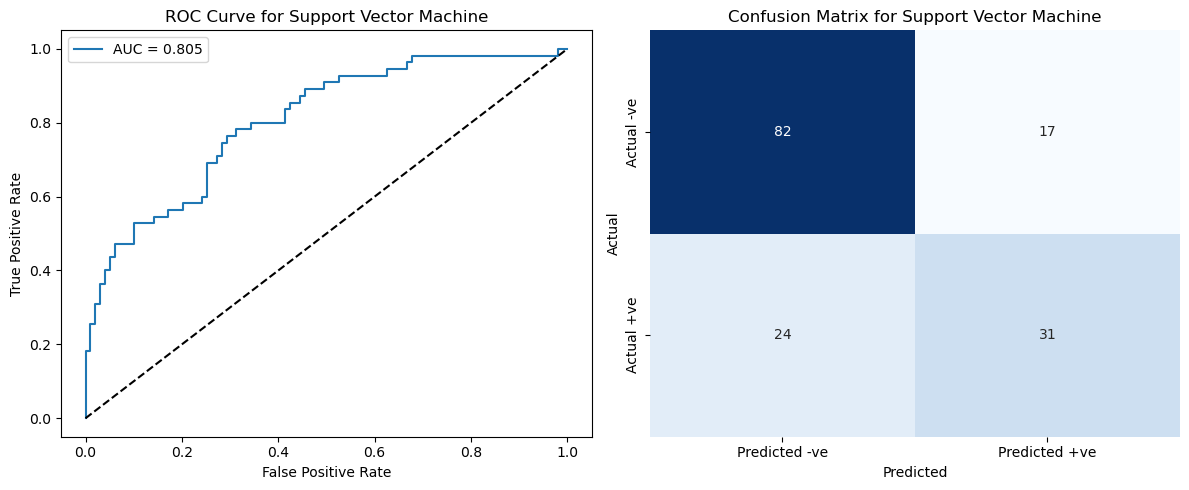

In [31]:
# Show ROC and confusion matrix for each supervised model

for model_name, metrics in results.items():
    # Create a figure with subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, metrics['y_probs'])
    ax[0].plot(fpr, tpr, label=f'AUC = {metrics["AUC"]:.3f}')
    ax[0].plot([0, 1], [0, 1], 'k--')  # Diagonal line
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title(f'ROC Curve for {model_name}')
    ax[0].legend()

    # Plot Confusion Matrix
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False,
                ax=ax[1], xticklabels=['Predicted -ve', 'Predicted +ve'], yticklabels=['Actual -ve', 'Actual +ve'])
    ax[1].set_title(f'Confusion Matrix for {model_name}')
    ax[1].set_ylabel('Actual')
    ax[1].set_xlabel('Predicted')

    # Adjust layout
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*150 + "\n")
